# Iniciando Aplicação

## Todas as informações contidas neste documento, é de uso pessoal de estudos. 


### Fontes: 
####     -   Seja Um Data Scientist ( youtube ), 
####     -   https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html
### 

# Bibliotecas

In [21]:
import pandas as pd
import numpy as np
import plotly.express as px  # função que desenha mapa

# Informações

### Ler um arquivo em uma pasta

In [42]:
df = pd.read_csv('../datasets/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### Verificar tipos de variáveis em cada coluna

In [43]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### converter de objeto para tipo data

In [44]:
df.date = pd.to_datetime(df.date)
df.date.head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

# Dicionário

### Como criar um dicionário

In [23]:


tabela = {
    "alicate": 45,
    "fenda": 12,
    "philips": 11
}

### Como obter valores do dicionário

In [12]:
tabela['alicate'] + tabela['fenda'] * tabela['philips']

177

# Agrupamento

### Filtrando itens

In [47]:
df_grouped = df[['id', 'bedrooms']].groupby( 'bedrooms') # pode adicionar .size() 


In [48]:
for bedrooms, frame in df_grouped:
    print('Número de quartos: {}'.format(df_grouped.bedrooms))
    print(frame.head(), end= '\n\n')

Número de quartos: <pandas.core.groupby.generic.SeriesGroupBy object at 0x00000226E64A83A0>
              id  bedrooms
875   6306400140         0
3119  3918400017         0
3467  1453602309         0
4868  6896300380         0
6994  2954400190         0

Número de quartos: <pandas.core.groupby.generic.SeriesGroupBy object at 0x00000226E64A8D30>
             id  bedrooms
154  7920100045         1
264  2123039032         1
350  7325600160         1
465  8658300340         1
648   922049078         1

Número de quartos: <pandas.core.groupby.generic.SeriesGroupBy object at 0x00000226E64AE8E0>
            id  bedrooms
2   5631500400         2
11  9212900260         2
18    16000397         2
23  8091400200         2
31  2426039314         2

Número de quartos: <pandas.core.groupby.generic.SeriesGroupBy object at 0x00000226E64AEB80>
           id  bedrooms
0  7129300520         3
1  6414100192         3
4  1954400510         3
6  1321400060         3
7  2008000270         3

Número de quarto

# Definir casas decimais

In [49]:
pd.set_option( 'display.float_format', lambda x: '%.2f' %x)

# Desvio Padrão


In [50]:
df[['sqft_living', 'yr_built']].groupby( 'yr_built').std ().reset_index().head()

#__ std() : é a função que calcula o desvio padrão.
#__ reset_index() : reseta as linhas para manter as colunas normais.


,yr_built,sqft_living
0,1900,732.94
1,1901,668.23
2,1902,878.66
3,1903,469.72
4,1904,1076.87


# Criando gráfico de barras

<BarContainer object of 2 artists>

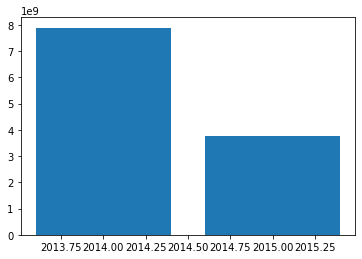

In [51]:
# Ideia: crescimento total de preços de compras dos imóveis por ano.
# Eixo x: Anos
# Eixo y: soma dos preços
# Gráfico: Barras


from matplotlib import pyplot as plt # (Da pasta 'matplotlib', importa 'pyplot')

# gráfico 1
df['year'] = df['date'].dt.year # cria uma coluna 'year' passa os valores do ano da coluna 'date'

by_year = df[['price', 'year']].groupby('year').sum().reset_index() # cria variável que recebe o grupo de preço e ano.

plt.bar(by_year['year'], by_year['price'])

# Criando gráfico Linhas

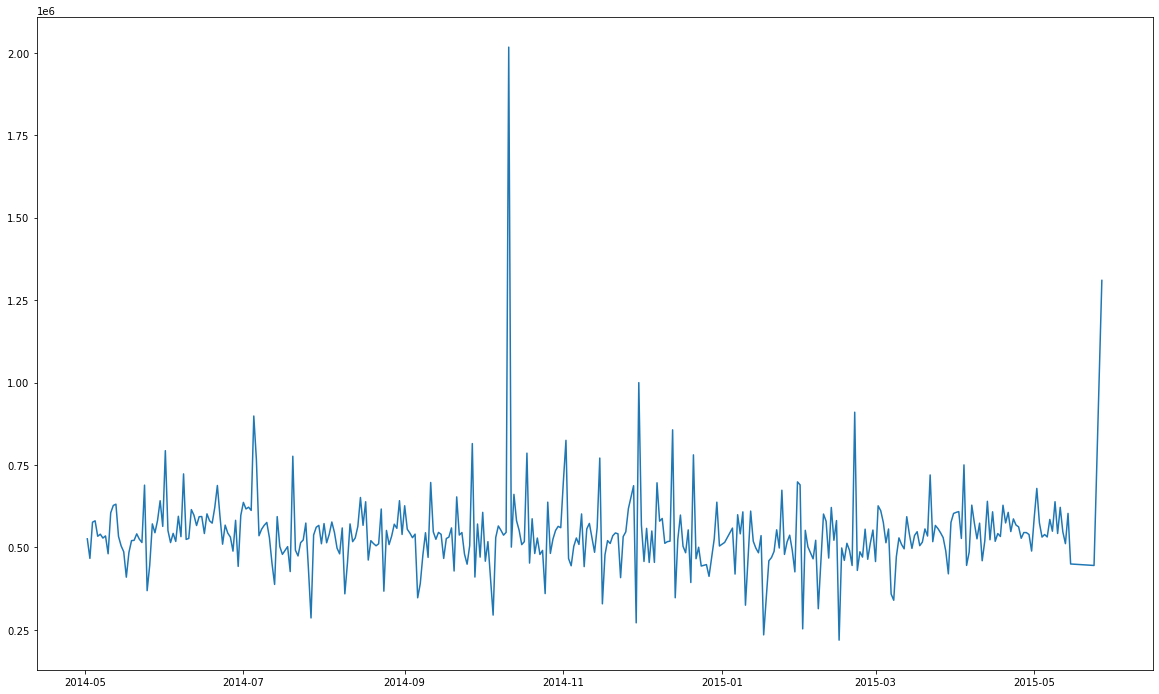

In [52]:
# Ideia: Ver evolução do preço médio
# gráfico 2

df['day'] = pd.to_datetime( df['date'])
by_day = df[['price', 'day']].groupby('day').mean().reset_index()


plt.figure( figsize= (20, 12))
plt.plot( by_day['day'], by_day['price'])



# Gráfico de linhas por semanas

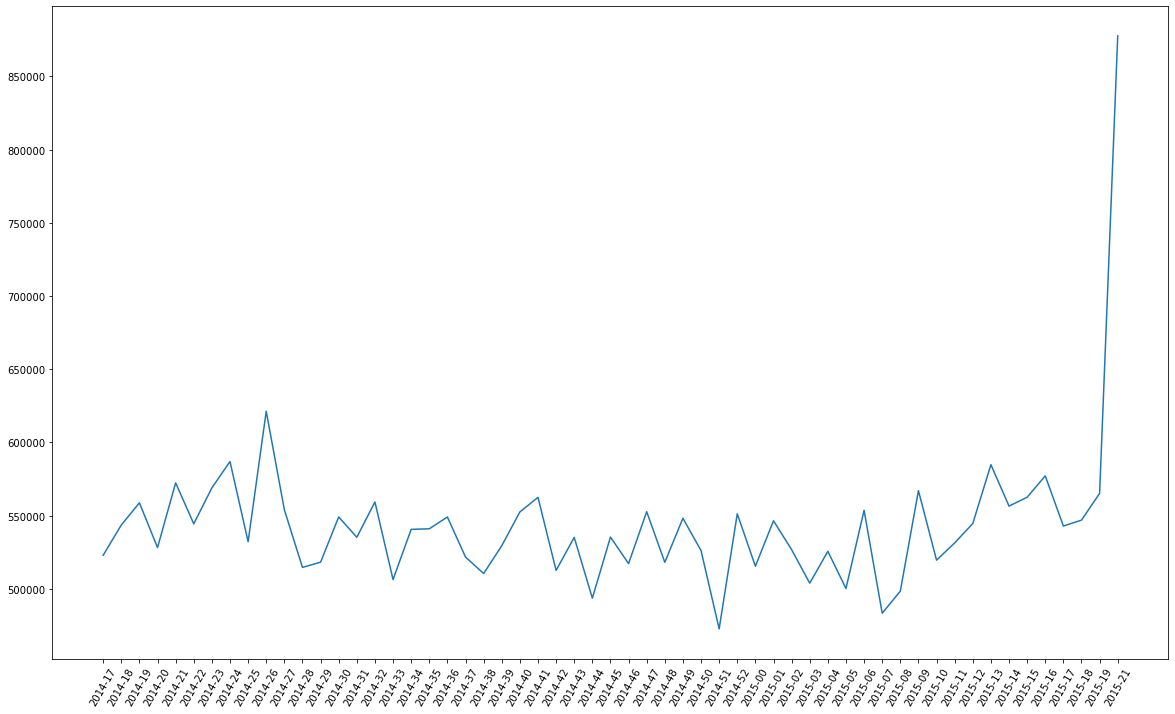

In [53]:
# gráfico 3

df['year_week'] = pd.to_datetime(df['date']).dt.strftime( '%Y-%U' )
by_year_week = df[['price', 'year_week']].groupby( 'year_week' ).mean().reset_index()

plt.figure( figsize= (20, 12))
plt.plot (by_year_week['year_week'], by_year_week ['price'] )
plt.xticks( rotation = 60);

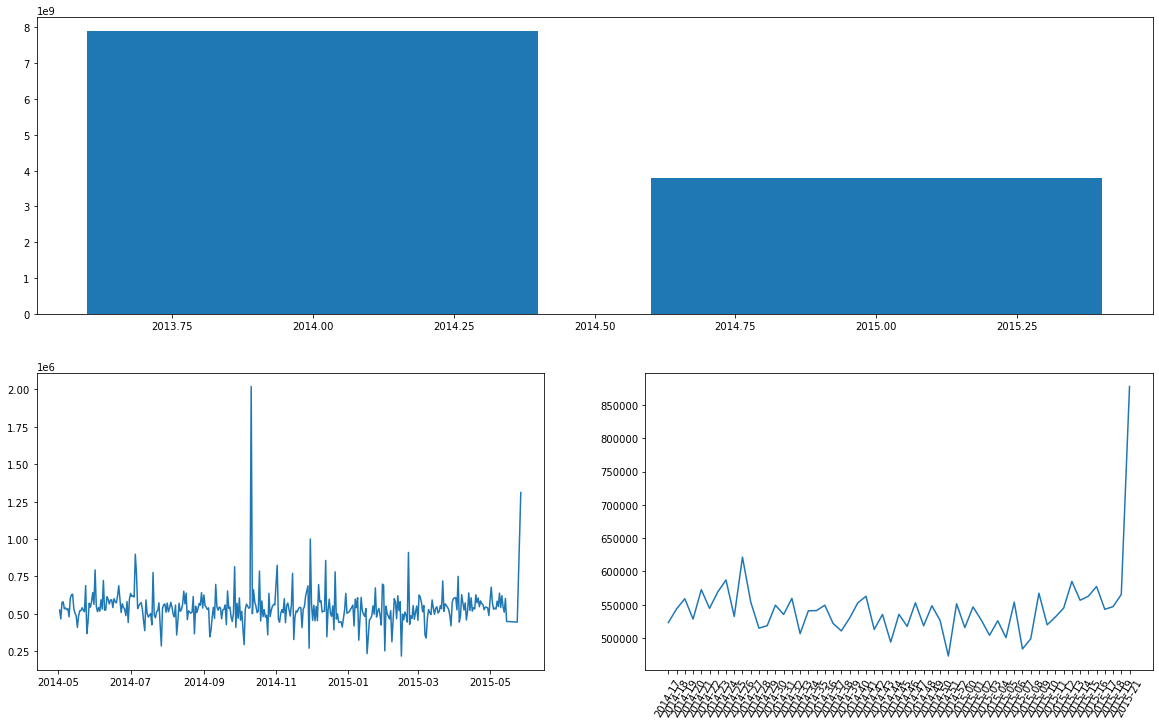

In [54]:
from matplotlib import gridspec

fig = plt.figure (figsize= (20, 12))
specs = gridspec.GridSpec (ncols= 2, nrows=2, figure= fig)


ax1 = fig.add_subplot (specs[0, :]) # primeira linha
ax2 = fig.add_subplot (specs[1, 0]) # segunda linha  - primeira coluna
ax3 = fig.add_subplot (specs[1, 1]) # segunda linha  - segunda coluna


# gráfico
df['year'] = df['date'].dt.year

by_year = df[['price', 'year']].groupby('year').sum().reset_index()

ax1.bar(by_year['year'], by_year['price'])

# gráfico 2
df['day'] = pd.to_datetime( df['date'])
by_day = df[['price', 'day']].groupby('day').mean().reset_index()

ax2.plot( by_day['day'], by_day['price'])

# gráfico 3
df['year_week'] = pd.to_datetime(df['date']).dt.strftime( '%Y-%U' )
by_year_week = df[['price', 'year_week']].groupby( 'year_week' ).mean().reset_index()
ax3.plot (by_year_week['year_week'], by_year_week ['price'] )
plt.xticks(rotation=60);

# Listas

In [55]:
# Estruturas de Dados - Lista
a = [2, 3, 4, 5, 6, 7]

# lista de Strings
b = ['seja', 'um', 'cientista', 'de', 'dados']

# Lista de String e números
c = ['seja', 1, 'cientista', 10, ['de', 10, 'dados'] ]

# criando uma lista vazia
d = []

# Adicionando Elementos

In [56]:
# a função .append(elemento) sempre coloca elemento no final da lista
c.append(50)

# a função .insert(posição, elemento) sempre coloca o elemento na posição desejada.
c.insert(4, 400)

# a função len(lista) retorna o tamanho da lista
print(c)
len(c)


['seja', 1, 'cientista', 10, 400, ['de', 10, 'dados'], 50]


7

# Estruturas de controle - CONDICIONAL

## Lógicas E (AND)
### Lógica de Multiplicação

### Bedrooms | Floors
##### True | True -> RESULTADO
##### True | False -> Erro

In [57]:
# TRUE & TRUE
data = df[(df['bedrooms'] == 4) & (df['floors'] == 2)]

# TRUE & FALSE
data = df[(df['bedrooms'] == 4) & (df['floors'] == 20)]

# FALSE & TRUE
data = df[(df['bedrooms'] == 50) & (df['floors'] == 2)]

#FALSE & FALSE
data = df[(df['bedrooms'] == 50) & (df['floors'] == 20)]


data.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,day,year_week


## Lógicas OU ( OR )
### Lógica de Soma

### Bedrooms | Floors
##### True | True -> RESULTADO
##### True | False -> RESULTADO
##### False | True -> RESULTADO
##### False | False -> ERRO

In [58]:
# TRUE & TRUE
data = df[(df['bedrooms'] == 4) | (df['floors'] == 2)]

# TRUE & FALSE
data = df[(df['bedrooms'] == 4) | (df['floors'] == 20)]

# FALSE & TRUE
data = df[(df['bedrooms'] == 50) | (df['floors'] == 2)]

#FALSE & FALSE
data = df[(df['bedrooms'] == 50) | (df['floors'] == 20)]


data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,day,year_week


## Construção lógica sem FOR 

In [77]:
# 1 Qual a quantidade de imóveis por nível ?
# - nível 0: Preço entre R$ 0.00 e R$ 321.950
# - nível 1: Preço entre 321.950 e R$  450.000
# - nível 2: Preço entre 450.000 e R$ 645.000
# - nível 3: Preço acima de R$ 645.000

df['nivel'] = 'NA'
df.loc[(df['price'] > 0) & (df['price'] < 321950), 'nivel'] = 'nivel_0'

df.loc[(df['price'] > 321950) & (df['price'] < 450000), 'nivel'] = 'nivel_1'

df.loc[(df['price'] > 450000) & (df['price'] < 645000), 'nivel'] = 'nivel_2'

df.loc[df['price'] > 645000, 'nivel'] = 'nivel_3'

df.loc[df['nivel'] == 'nivel_3'].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,day,year_week,nivel
5,7237550310,2014-05-12,1225000.00,4,4.50,5420,101930,1.00,0,0,...,0,98053,47.66,-122.00,4760,101930,2014,2014-05-12,2014-19,nivel_3
10,1736800520,2015-04-03,662500.00,3,2.50,3560,9796,1.00,0,0,...,0,98007,47.60,-122.14,2210,8925,2015,2015-04-03,2015-13,nivel_3
15,9297300055,2015-01-24,650000.00,4,3.00,2950,5000,2.00,0,3,...,0,98126,47.57,-122.38,2140,4000,2015,2015-01-24,2015-03,nivel_3
21,2524049179,2014-08-26,2000000.00,3,2.75,3050,44867,1.00,0,4,...,0,98040,47.53,-122.23,4110,20336,2014,2014-08-26,2014-34,nivel_3
26,1794500383,2014-06-26,937000.00,3,1.75,2450,2691,2.00,0,0,...,0,98119,47.64,-122.36,1760,3573,2014,2014-06-26,2014-25,nivel_3


## Construção lógica com FOR


In [84]:
for i in range(len(df)):
    if (df.loc[i, 'price'] > 0) & (df.loc[i, 'price'] < 321950):
        df.loc[i, 'nivel'] = 'nivel_0'
        
    elif (df.loc[i, 'price'] > 321950) & (df.loc[i, 'price'] < 450000):
        df.loc[i, 'nivel'] = 'nivel_1'
                
    elif (df.loc[i, 'price'] > 450000) & (df.loc[i, 'price'] < 645000):
        df.loc[i, 'nivel'] = 'nivel_2'
                
    else:
        df.loc[i, 'nivel'] = 'nivel_3'

df['nivel'].head(20)

0     nivel_0
1     nivel_2
2     nivel_0
3     nivel_2
4     nivel_2
5     nivel_3
6     nivel_0
7     nivel_0
8     nivel_0
9     nivel_1
10    nivel_3
11    nivel_2
12    nivel_0
13    nivel_1
14    nivel_2
15    nivel_3
16    nivel_1
17    nivel_2
18    nivel_0
19    nivel_0
Name: nivel, dtype: object

# Estruturas de controle - LAÇOS
## Usando API

## Laço while

In [24]:
# A BIBLIOTECA request É USADA PARA TRABALHAR COM API EM PYTHON
import requests as r 

# CRIANDO ESTRUTURA DE CONTROLE while
i = 1
dataset = pd.DataFrame() # CRIA DataFrame VAZIO

while True: # QUANDO NÃO SOUBEMOS O FINAL DA LISTA, UTILIZAMOS while
    
    print (f'page:{i}') # IMPRIME AS PÁGINAS NO CONSOLE
    
    url = f'https://jobs.github.com/positions.json?page={i}' # VARIÁVEL QUE CONTÉM A API
    
    response = r.request( 'GET', url ) # VARIÁVEL QUE OBTEM ('GET') OS DADOS DA API 
    
    # CONDIÇÃO A QUAL VERIFICA ATÉ QUANDO O LOOP VAI EXISTIR
    if response.json() != []: # SE response.json() FOR DIFERENTE DE VAZIO
        
        data = response.json()[0] # data INICIA NO PRIMEIRO ÍNDICE
        
        df = pd.DataFrame (data, index=[0]) # O DATA FRAMES INICIA A PARTIR DO PRIMEIRO INDEX
        
        # FUNÇÃO pd.concat(), CONCATENA COLUNAS, LADO A LADO OU UM ABAIXO DO OUTRO
        # axis = 0, DIZ PARA O CANCAT QUE AS COLUNAS SERÃO UM AO LADO DO OUTRO
        dataset = pd.concat ([dataset, df], axis= 0) 
        
        i += 1 # INCREMENTA NA VARIÁVEL i
    
    else: # SE A LISTA FOR VAZIO, PARE O LOOPING
        break 

df.head()

page:1
page:2
page:3
page:4
page:5
page:6


,id,type,url,created_at,company,company_url,location,title,description,how_to_apply,company_logo
0,1731001f-91e1-415e-a865-898a9f1279fa,Full Time,https://jobs.github.com/positions/1731001f-91e...,Thu Jan 07 23:34:50 UTC 2021,avoMD,http://avomd.io,Remote in the US,Lead Engineer,<p>Job Description – Lead Engineer</p>\n<p><st...,"<p>Email your resume to Laurence at <a href=""m...",https://jobs.github.com/rails/active_storage/b...
